<center><h1>Altanoveo TP</h1></center>

## Importation des librairies

In [52]:
import numpy as np
import pandas as pd
import json
from glob import glob
import spacy
from collections import Counter
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow import keras

## Importation du vocabulaire

In [2]:
nlp = spacy.load("en_core_web_sm")
vocab = list(nlp.vocab.strings)
stop_words = list(nlp.Defaults.stop_words) + ["rt", "click"]

## Fonction de vérification du vocabulaire

In [3]:
def keep_in_voc(sentence):
    doc = nlp(" ".join([token for token in sentence.split(' ') if token in vocab and token not in ["rt", "click"]]))
    lemma_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemma_tokens)

## Importation des données

#### Fonction de suppression des émoticons

In [4]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#### Parcours des fichiers contenant des tweets et récupération du contenu

In [5]:
texts = pd.DataFrame()
fire_tweets = glob('*/*output_tweet.json')
without_fire_tweets = glob('without_fire/*output*.json')

for tweet in tqdm(fire_tweets):
    with open(tweet, 'r') as file:
        try:
            content = json.loads(file.read())['data']
            for elt in content:
                if elt['lang'] == 'en':
                    cleaned_text = remove_emoji(elt['text'].replace('#', '').replace('\n', ' ')).lower()
                    cleaned_text = keep_in_voc(cleaned_text)
                    
                    texts = pd.concat([texts, pd.DataFrame.from_dict({'is_fire': [True], 'text': [cleaned_text]})], ignore_index=True)
        except:
            print("Erreur : pas de données dans le fichier")

for tweet in tqdm(without_fire_tweets):
    with open(tweet, 'r') as file:
        try:
            content = json.loads(file.read())['data']
            for elt in content:
                if elt['lang'] == 'en':
                    cleaned_text = remove_emoji(elt['text'].replace('#', '').replace('\n', ' ')).lower()
                    cleaned_text = keep_in_voc(cleaned_text)
                    texts = pd.concat([texts, pd.DataFrame.from_dict({'is_fire': [False], 'text': [cleaned_text]})], ignore_index=True)
        except:
            print("Erreur : pas de données dans le fichier")

texts.head()

Erreur : pas de données dans le fichier


,is_fire,text
0,True,like the fire that be destroy greece and
1,True,greece bring under control as more blaze threa...
2,True,try to find a fire here that will help we unde...
3,True,greece bring under control as more blaze threa...
4,True,greece bring under control as more blaze threa...


## Tf-idf

In [6]:
vectorizer = TfidfVectorizer(min_df=0, max_features=10000)
vectors = vectorizer.fit_transform(texts['text'])
feature_names = vectorizer.get_feature_names_out()
denselist = vectors.todense().tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)
tf_idf

,00,000,01,014,02,03,04,060,07,08,...,zane,zealand,zero,zeus,zimbabwe,zodiac,zoe,zone,zoo,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data = pd.concat([texts, tf_idf], axis=1)
data.head()

,is_fire,text,00,000,01,014,02,03,04,060,...,zane,zealand,zero,zeus,zimbabwe,zodiac,zoe,zone,zoo,zucchini
0,True,like the fire that be destroy greece and,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,greece bring under control as more blaze threa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,try to find a fire here that will help we unde...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,greece bring under control as more blaze threa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,True,greece bring under control as more blaze threa...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(np.asarray(vectors.todense()), data['is_fire'], test_size=0.20)

## Pénalisation de la prédiction des classes

In [9]:
Counter(data['is_fire'])[True]

3568

In [10]:
p0 = len(data) / (2 * Counter(data['is_fire'])[False])
p1 = len(data) / (2 * Counter(data['is_fire'])[True])
class_weights = {0: p0, 1: p1}
print(Counter(data['is_fire']))
print('Poids :', class_weights)

Counter({True: 3568, False: 3567})
Poids : {0: 1.0001401738155313, 1: 0.999859865470852}


## Modélisation

#### Extra Tree Classifier

In [24]:
clf = ExtraTreeClassifier(class_weight=class_weights)
clf = clf.fit(X_train, y_train)
justesse = clf.score(X_test, y_test)
justesse

0.8843728100911002

#### Matrice de confusion et métriques

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
pd.DataFrame.from_dict({'justesse': [justesse], 'précision': [tp/(tp+fp)], 'rappel': [tp/(tp+fn)], 'f1-score': [2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))]})

,justesse,précision,rappel,f1-score
0,0.884373,0.896601,0.873103,0.884696


#### CART

In [26]:
clf = DecisionTreeClassifier(class_weight=class_weights)
clf = clf.fit(X_train, y_train)
justesse = clf.score(X_test, y_test)
justesse

0.9670637701471618

#### Matrice de confusion et métriques

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
pd.DataFrame.from_dict({'justesse': [justesse], 'précision': [tp/(tp+fp)], 'rappel': [tp/(tp+fn)], 'f1-score': [2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))]})

,justesse,précision,rappel,f1-score
0,0.967064,0.984286,0.950345,0.967018


#### Ada Boost Classifier

In [44]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.8)
clf = clf.fit(X_train, y_train)
justesse = clf.score(X_test, y_test)
justesse

0.9698668535388928

#### Matrice de confusion et métriques

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
pd.DataFrame.from_dict({'justesse': [justesse], 'précision': [tp/(tp+fp)], 'rappel': [tp/(tp+fn)], 'f1-score': [2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))]})

,justesse,précision,rappel,f1-score
0,0.969867,0.991354,0.948966,0.969697


#### Random Forest

In [46]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
justesse = clf.score(X_test, y_test)
justesse

0.9775753328661527

#### Matrice de confusion et métriques

In [47]:
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
pd.DataFrame.from_dict({'justesse': [justesse], 'précision': [tp/(tp+fp)], 'rappel': [tp/(tp+fn)], 'f1-score': [2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))]})

,justesse,précision,rappel,f1-score
0,0.977575,0.995708,0.96,0.977528


#### Bagging Classifier

In [53]:
clf = BaggingClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
justesse = clf.score(X_test, y_test)
justesse

0.9733707077785564

#### Matrice de confusion et métriques

In [54]:
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
pd.DataFrame.from_dict({'justesse': [justesse], 'précision': [tp/(tp+fp)], 'rappel': [tp/(tp+fn)], 'f1-score': [2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))]})

,justesse,précision,rappel,f1-score
0,0.973371,0.997106,0.950345,0.973164


## Nuage de mots

In [13]:
wordcloud = WordCloud(width = 800, height = 800,
    background_color ='white',
    stopwords = set(stop_words),
    min_font_size = 10).generate(" ".join(texts['text']))

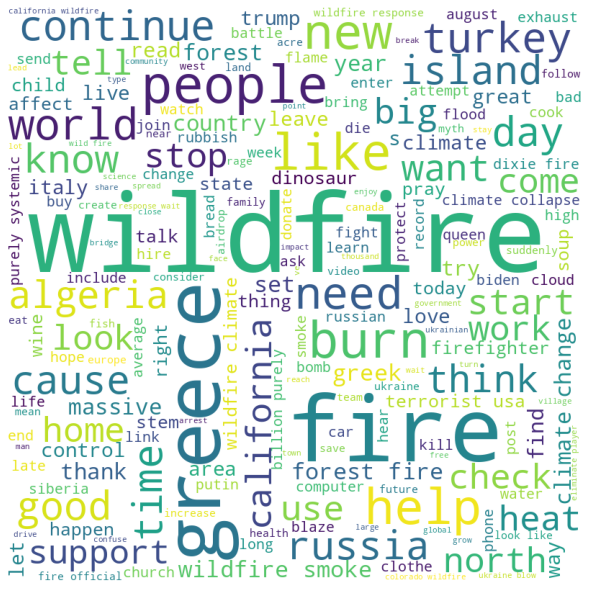

In [14]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Régression logistique

In [15]:
reg_model = LogisticRegression(class_weight=class_weights).fit(X_train, y_train)
justesse = reg_model.score(X_test, y_test)
justesse

0.9621583742116327

## Calcul des indicateurs de performance

In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, reg_model.predict(X_test)).ravel()
pd.DataFrame.from_dict({'justesse': [justesse], 'précision': [tp/(tp+fp)], 'rappel': [tp/(tp+fn)], 'f1-score': [2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))]})

,justesse,précision,rappel,f1-score
0,0.962158,0.998514,0.926897,0.961373


In [17]:
size = 0
coefs = reg_model.coef_[0].tolist()
coef_sum = sum(coefs)
w_words = pd.DataFrame()
while size < 10:
    max_value = max(coefs)
    index = coefs.index(max_value)
    w_words = pd.concat([w_words, pd.DataFrame.from_dict({'index_word': [index], 'weight': [max_value/coef_sum]})])
    coefs[index] = 0
    size += 1

In [18]:
words = [tf_idf.columns[row['index_word']] for index, row in w_words[['index_word']].iterrows()]

Text(0, 0.5, 'poids')

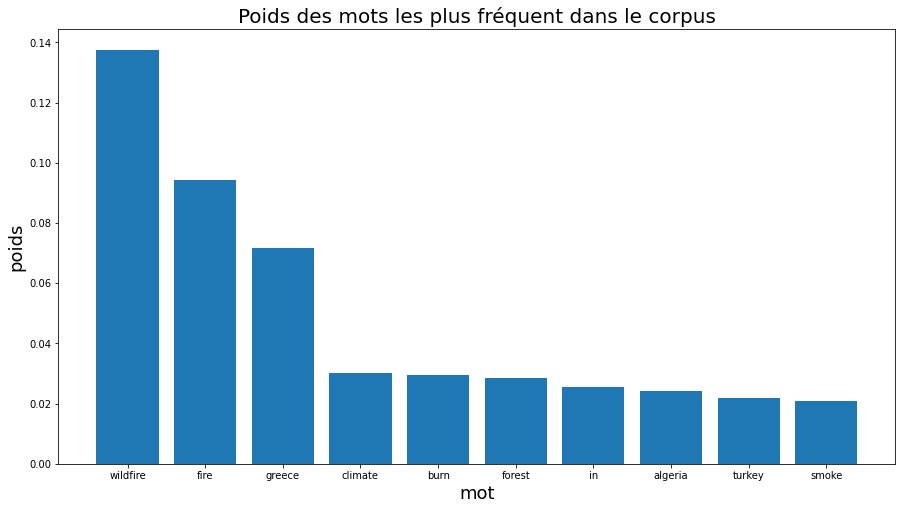

In [19]:
fig, plot = plt.subplots(1, 1)
fig.set_size_inches(15, 8)
plot.bar(words, w_words['weight'])
plot.set_title('Poids des mots les plus fréquent dans le corpus', size=20)
plot.set_xlabel('mot', size=18)
plot.set_ylabel('poids', size=18)

## Utilisation d'un réseau de neurones

In [20]:
model = keras.Sequential()
model.add(keras.Input(shape=(X_train[0].shape)))
model.add(keras.layers.Dense(4000))
model.add(keras.layers.Dense(2000))
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

2022-03-12 10:14:17.615471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-12 10:14:17.615510: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-12 10:14:17.615525: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-4F30THV): /proc/driver/nvidia/version does not exist
2022-03-12 10:14:17.615701: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=30,
    shuffle=True
)

Epoch 1/30
12/12 [==============================] - 3s 192ms/step - loss: 0.2933 - accuracy: 0.8777
Epoch 2/30
12/12 [==============================] - 2s 184ms/step - loss: 0.0339 - accuracy: 0.9884
Epoch 3/30
12/12 [==============================] - 2s 176ms/step - loss: 0.0122 - accuracy: 0.9958
Epoch 4/30
12/12 [==============================] - 2s 181ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 5/30
12/12 [==============================] - 2s 176ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 6/30
12/12 [==============================] - 2s 183ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 7/30
12/12 [==============================] - 2s 180ms/step - loss: 0.0014 - accuracy: 0.9995
Epoch 8/30
12/12 [==============================] - 2s 179ms/step - loss: 0.0014 - accuracy: 0.9995
Epoch 9/30
12/12 [==============================] - 2s 177ms/step - loss: 0.0013 - accuracy: 0.9995
Epoch 10/30
12/12 [==============================] - 2s 177ms/step - loss: 0.0013 - accuracy: 0.9995

In [22]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 1s 19ms/step - loss: 0.3460 - accuracy: 0.9418


[0.3460490107536316, 0.9418359994888306]